In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df.shape)

(891, 12)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame({'Missing Values': missing})
print(missing_df)


             Missing Values
Cabin                   687
Age                     177
Embarked                  2
PassengerId               0
Name                      0
Pclass                    0
Survived                  0
Sex                       0
Parch                     0
SibSp                     0
Fare                      0
Ticket                    0


<Axes: >

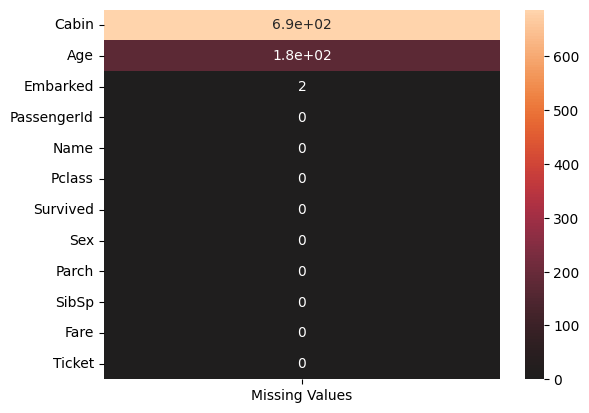

In [16]:
sns.heatmap(missing_df,center=0,annot=True)

In [20]:
summary_stats=df.describe()

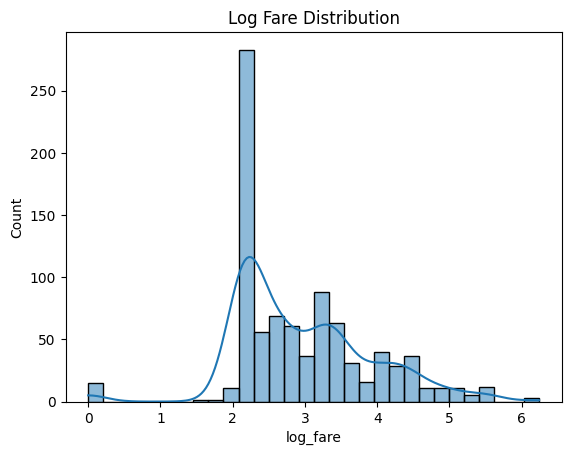

<Axes: xlabel='Sex', ylabel='count'>

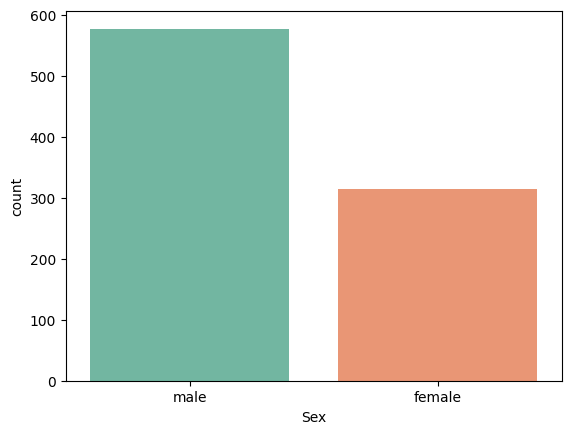

In [108]:
sns.countplot(x='Sex', data=df, palette='Set2')

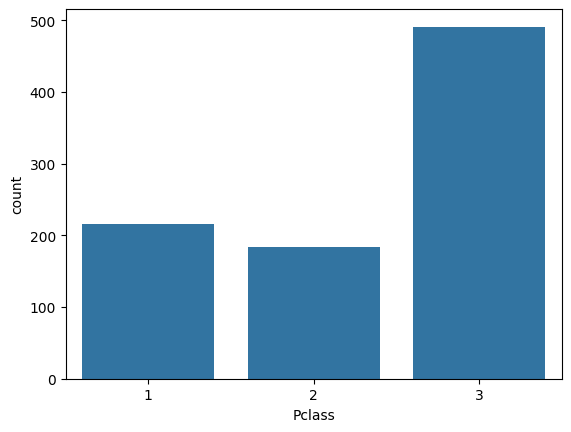

In [112]:
sns.countplot(x='Pclass', data=df)
plt.show()

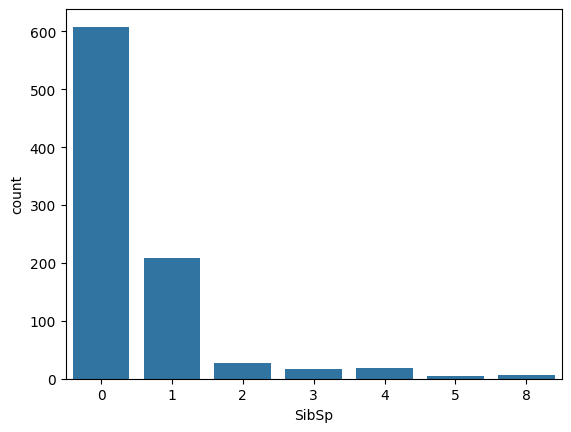

In [113]:
sns.countplot(x='SibSp', data=df)

plt.show()

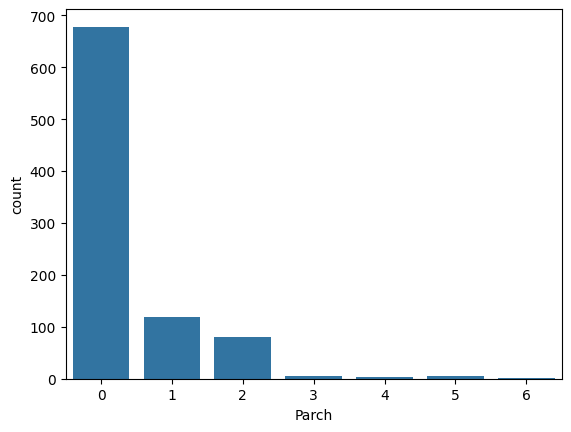

In [115]:
sns.countplot(x='Parch', data=df)
plt.show()

In [21]:
summary_stats #this is the summary of the dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


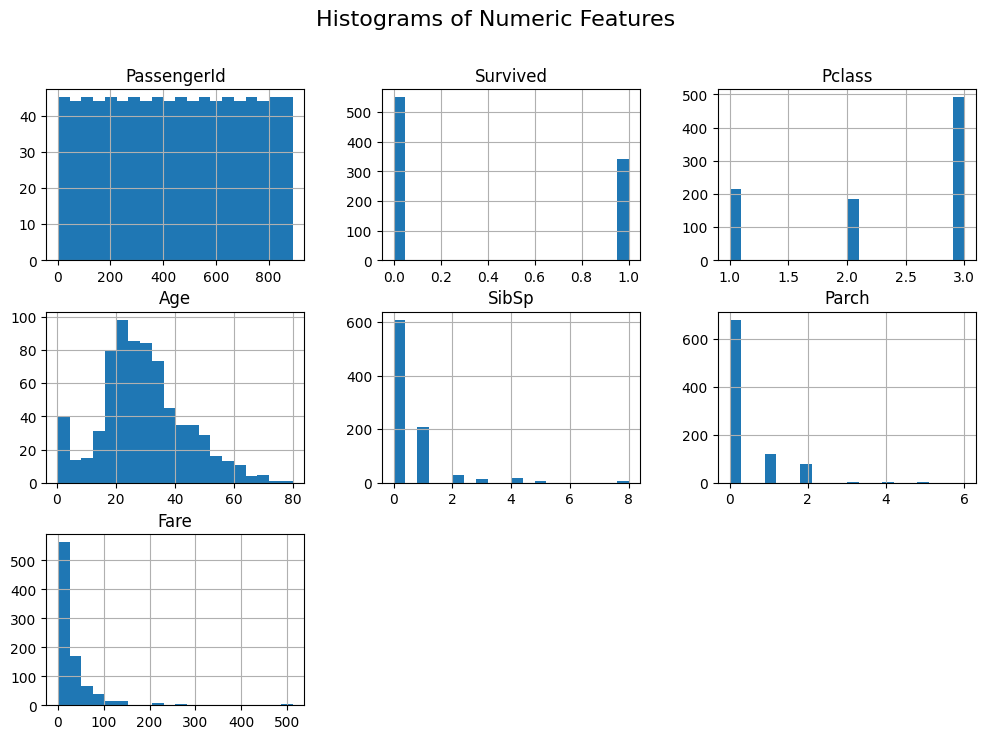

In [22]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#histograms
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


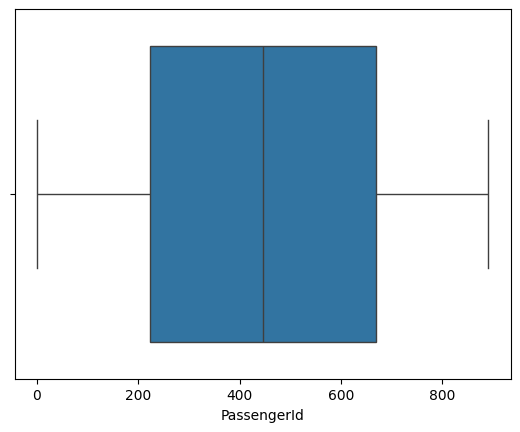

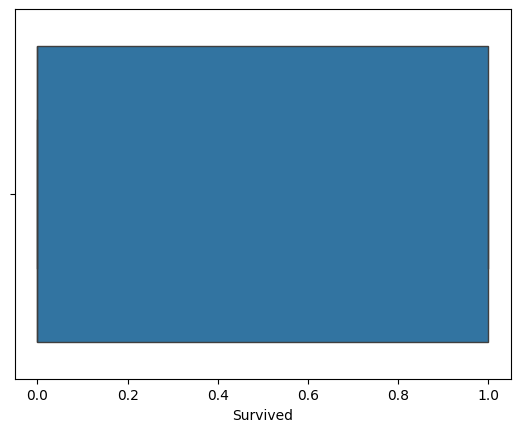

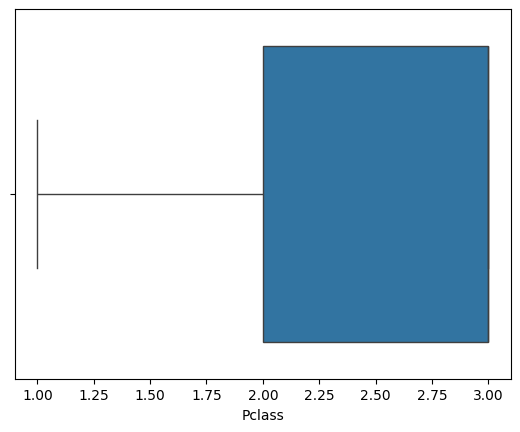

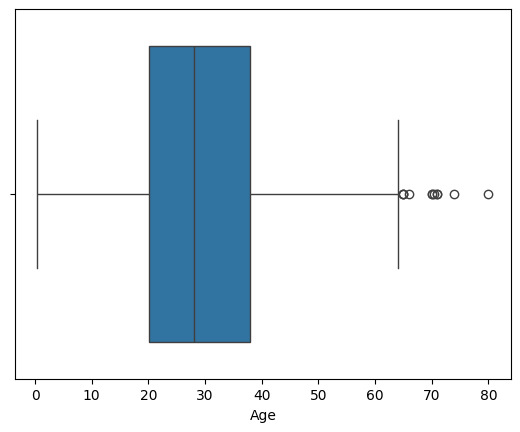

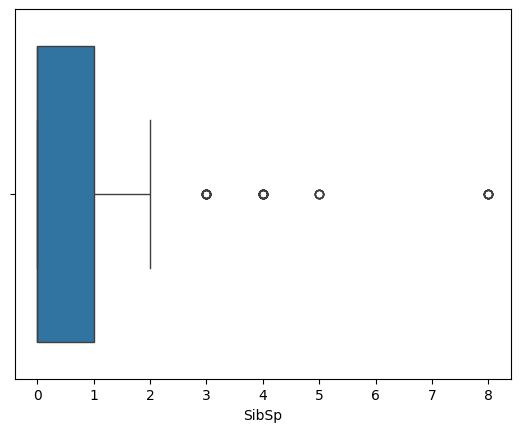

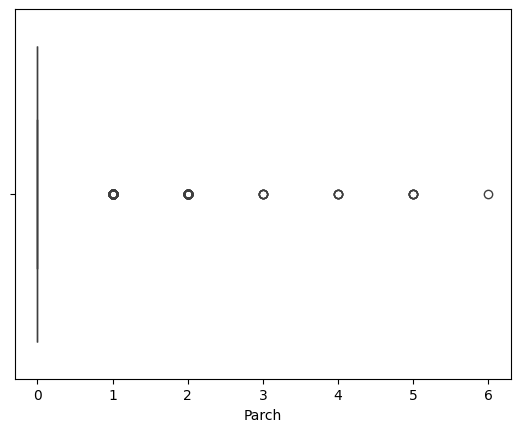

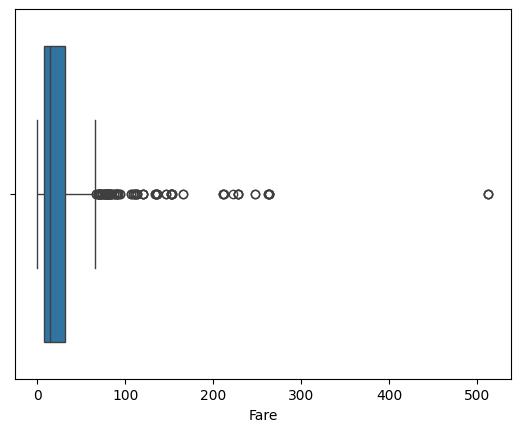

In [28]:
for col in numeric_cols:
  sns.boxplot(data=df[col],orient='h')
  plt.show()

In [38]:
corr=df[numeric_cols].corr

In [40]:
corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

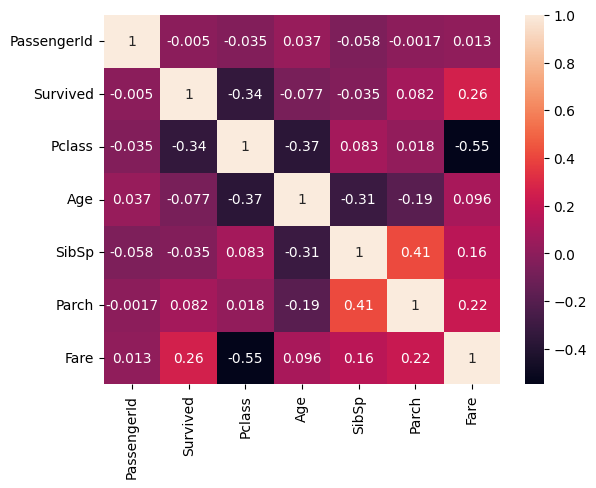

In [42]:
sns.heatmap(corr(),annot=True)

In [55]:
columns=df.columns


In [66]:
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

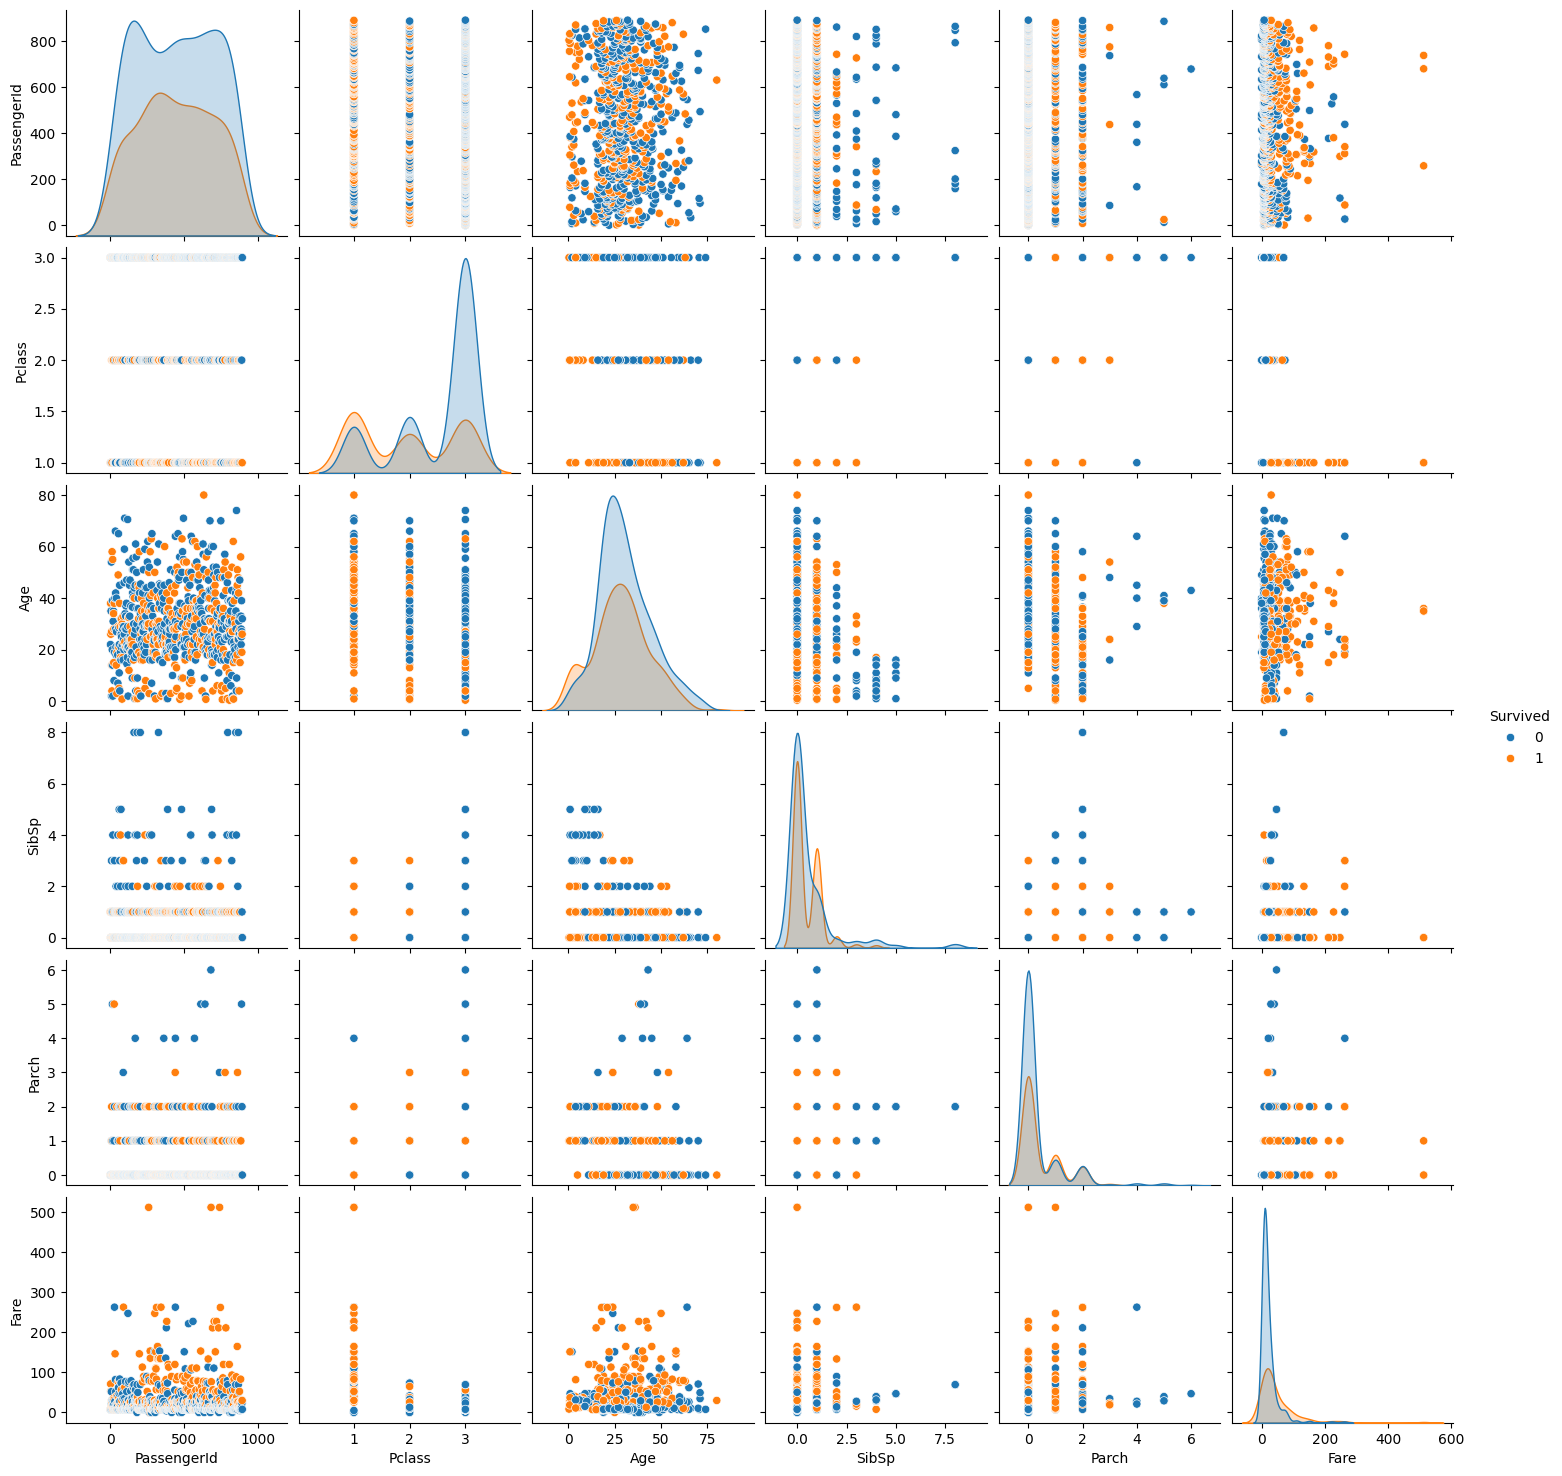

In [71]:
sns.pairplot(df[columns], hue='Survived')
plt.show()

Identifying the trends

<Axes: xlabel='Sex', ylabel='count'>

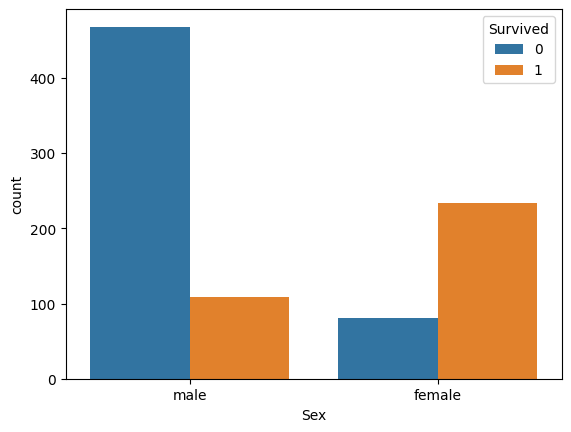

In [79]:
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

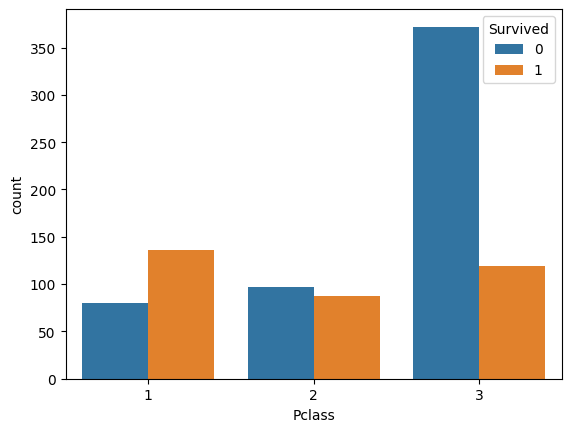

In [80]:
sns.countplot(x='Pclass', hue='Survived', data=df)

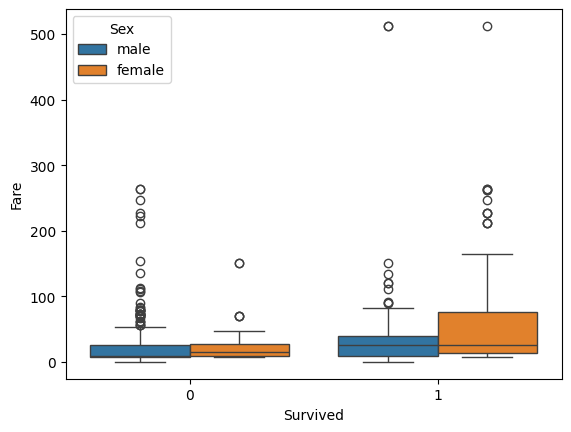

In [86]:
sns.boxplot(x='Survived', y='Fare', data=df, hue='Sex')
plt.show()

Visualization:
Sex: Females had higher survival rate.

Class: 1st class had higher survival rate than 3rd.

Fare: Survivors generally paid higher fares.

Age: Children under ~10 had a higher survival rate.

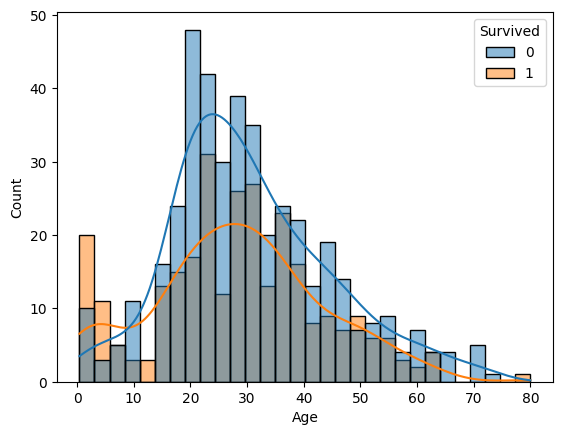

In [89]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.show()

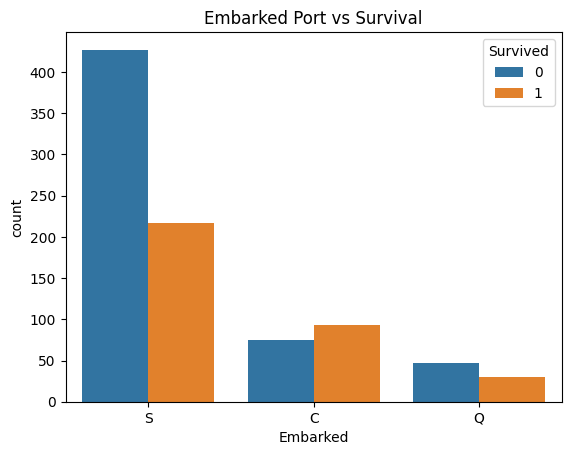

In [88]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Embarked Port vs Survival")
plt.show()

Text(0.5, 1.0, 'Survival by Gender')

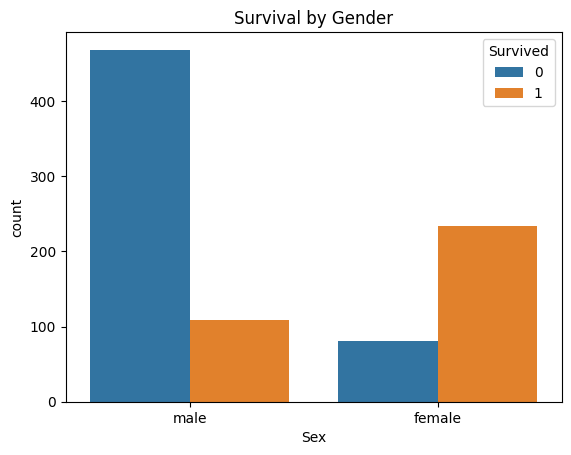

In [90]:
fig1, ax1 = plt.subplots()
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax1)
ax1.set_title('Survival by Gender')

In [92]:
summary_results = {
    "Shape": df.shape,
    "Missing Data": missing_df,
    "Summary Statistics": summary_stats,
}

summary_results

{'Shape': (891, 12),
 'Missing Data':              Missing Values
 Cabin                   687
 Age                     177
 Embarked                  2
 PassengerId               0
 Name                      0
 Pclass                    0
 Survived                  0
 Sex                       0
 Parch                     0
 SibSp                     0
 Fare                      0
 Ticket                    0,
 'Summary Statistics':        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.00000

Multivariate analysis

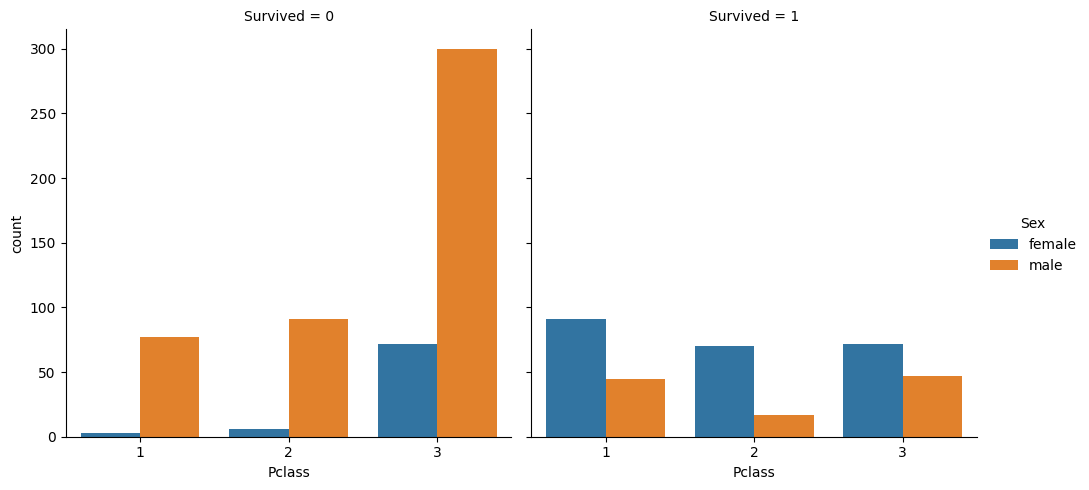

In [94]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')


<Axes: xlabel='Age', ylabel='Fare'>

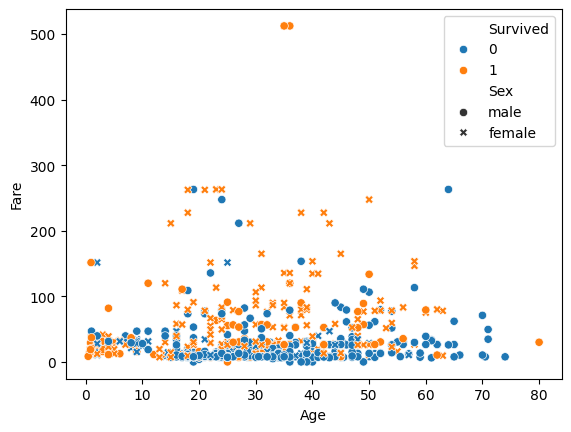

In [96]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', style='Sex')


Summary Insigts:
Sex	Females had higher survival rate,
Class	1st class passengers survived more,
Age	Children had higher survival,
Fare	Higher fare → higher chance of survival,
Embarked	Port C had highest survival rate,
Family	Those with small families had better survival.